## The influence of extending the 3-point Arc on scoring in NCAA Men's Baksetball.

According to the list of NCAA rule changes in this wikipedia [article](https://en.wikipedia.org/wiki/College_basketball), "a three-point shot was introduced, with the line a uniform 19 feet 9 inches (6.02 m) from the center of the basket," for the 1986-1987 season.

For the 2008-2009 season the "three-point arc extended to 20 feet 9 inches (6.32 m) from the center of the basket."

In 2019-2020 "the three-point arc was extended to the FIBA distance of 6.75 meters (22 ft 2 in) from the center of the basket and 6.6 meters (21 ft 8 in) in the corners. This change took immediate effect in Division I, and will take effect in Divisions II and III in 2020–21. "

Intuitively, I expect that upon comparing average home and away team scoring in a season immediately before an arc extension to the average scoring in the season with the new arc distance, that scoring would decrease. However, I wanted to verify if that was actually the case, and if the change was *statistically significant* or attributable to the random variations inherent in sports data. Finally, I will check the game total wagering market data for any trend towards the *under* in the post-arc-extension season. I am only looking at the effect on team level scoring here. 

For this analysis I used the historical scores and odds datasets available [here](https://sportsbookreviewsonline.com) after removing rows with missing data and adding some extra columns to streamline the analysis.

In [1]:
# import and preview the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('ncaam_07_20_formatted.csv')
df.head()

,date,away court,away team,away ml,away dec,away final,home court,home team,home ml,home dec,home final,market total,total actual,market mov,home mov actual,home win
0,20071105,N,Maine,200,3.000,42,N,Richmond,-240,1.416667,44,127.5,86,5.5,2,1
1,20071105,V,TennMartin,13000,131.000,71,H,MemphisU,-39000,1.002564,102,144.0,173,35.5,31,1
2,20071106,N,GardnerWebb,-160,1.625,69,N,AlabamaA&M,140,2.400000,55,139.5,124,-3.0,-14,0
3,20071106,V,CentralArkansas,3000,31.000,40,H,Kentucky,-7000,1.014286,67,134.0,107,26.5,27,1
4,20071106,N,Maine,105,2.050,62,N,TennMartin,-125,1.800000,66,128.0,128,1.5,4,1


In [2]:
#extract scoring data for the 07-08, 08-09, 18-19, 19-20 seasons
a_data_0708 = df[df['date']<20081100]['away final'].values
a_avg_0708 = a_data_0708.mean() # the average away team score for the 2007-2008 season
a_std_0708 = a_data_0708.std() # the standard deviation of away team scoring for the 2007-2008 season
h_data_0708 = df[df['date']<20081100]['home final'].values 
h_avg_0708 = h_data_0708.mean() # the average home team score for the 2007-2008 season
h_std_0708 = h_data_0708.std() # the standard deviation of home team scoring for the 2007-2008 season
n_sam_0708 = len(df[df['date']<20081100]) # number of samples for the 2007-2008 season

a_data_0809 = df[(df['date']>20081100) & (df['date']<20091100)]['away final'].values 
a_avg_0809 = a_data_0809.mean()
a_std_0809 = a_data_0809.std()
h_data_0809 = df[(df['date']>20081100) & (df['date']<20091100)]['home final'].values 
h_avg_0809 = h_data_0809.mean()
h_std_0809 = h_data_0809.std()
n_sam_0809 = len(df[(df['date']>20081100) & (df['date']<20091100)])

a_data_1819 = df[(df['date']>20181100) & (df['date']<20191100)]['away final'].values 
a_avg_1819 = a_data_1819.mean()
a_std_1819 = a_data_1819.std()
h_data_1819 = df[(df['date']>20181100) & (df['date']<20191100)]['home final'].values 
h_avg_1819 = h_data_1819.mean()
h_std_1819 = h_data_1819.std()
n_sam_1819 = len(df[(df['date']>20181100) & (df['date']<20191100)])

a_data_1920 = df[(df['date']>20191100) & (df['date']<20201100)]['away final'].values 
a_avg_1920 = a_data_1920.mean()
a_std_1920 = a_data_1920.std()
h_data_1920 = df[(df['date']>20191100) & (df['date']<20201100)]['home final'].values 
h_avg_1920 = h_data_1920.mean()
h_std_1920 = h_data_1920.std()
n_sam_1920 = len(df[(df['date']>20191100) & (df['date']<20201100)])

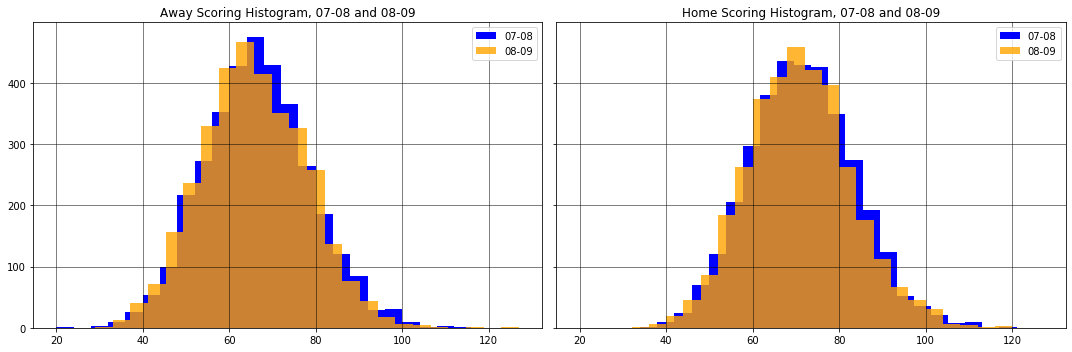

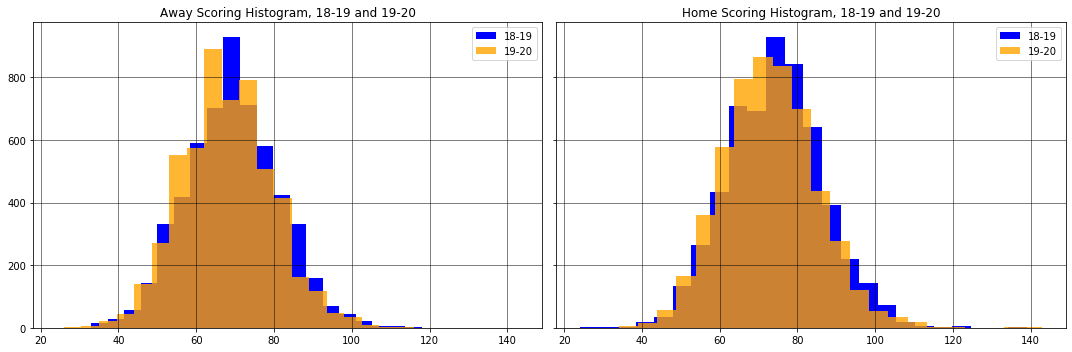

In [3]:
# do a quick visual check of the scoring distributions
fig, axs = plt.subplots(ncols=2,sharex=True,sharey=True,figsize=(15,5),gridspec_kw=dict(width_ratios=[10,10]))
axs[0].title.set_text('Away Scoring Histogram, 07-08 and 08-09')
axs[0].hist(df[df['date']<20081100]['away final'], bins=24, color='blue')
axs[0].hist(df[(df['date']>20081100) & (df['date']<20091100)]['away final'], bins=24, color='orange', alpha=0.8)
axs[0].grid(linestyle='-', linewidth='0.5', color='black')
axs[0].legend(labels=['07-08','08-09'])
axs[1].title.set_text('Home Scoring Histogram, 07-08 and 08-09')
axs[1].hist(df[df['date']<20081100]['home final'], bins=22, color='blue')
axs[1].hist(df[(df['date']>20081100) & (df['date']<20091100)]['home final'], bins=22, color='orange', alpha=0.8)
axs[1].grid(linestyle='-', linewidth='0.5', color='black')
axs[1].legend(labels=['07-08','08-09'])
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(ncols=2,sharex=True,sharey=True,figsize=(15,5),gridspec_kw=dict(width_ratios=[10,10]))
axs[0].title.set_text('Away Scoring Histogram, 18-19 and 19-20')
axs[0].hist(df[(df['date']>20181100) & (df['date']<20191100)]['away final'], bins=20, color='blue')
axs[0].hist(df[(df['date']>20191100) & (df['date']<20201100)]['away final'], bins=20, color='orange', alpha=0.8)
axs[0].grid(linestyle='-', linewidth='0.5', color='black')
axs[0].legend(labels=['18-19','19-20'])
axs[1].title.set_text('Home Scoring Histogram, 18-19 and 19-20')
axs[1].hist(df[(df['date']>20181100) & (df['date']<20191100)]['home final'], bins=24, color='blue')
axs[1].hist(df[(df['date']>20191100) & (df['date']<20201100)]['home final'], bins=22, color='orange', alpha=0.8)
axs[1].grid(linestyle='-', linewidth='0.5', color='black')
axs[1].legend(labels=['18-19','19-20'])
plt.tight_layout()
plt.show()

Upon visually inspecting the scoring distributions, they appear similar but the seasons after the arc extensions (shown in orange) exhibit a slight leftward shift of the center of the distribution. This is most visually prominent in the "Home Scoring Histogram, 18-19 and 19-20," on the bottom right. 

Let's calculate the actual statistics needed to check for a significant change in scoring between these seasons.

In [4]:
print('2007-2008 season scoring stats:')
print(f'away avg: {a_avg_0708:.2f}, away std: {a_std_0708:.2f}, home avg: {h_avg_0708:.2f}, home std: {h_std_0708:.2f}, n={n_sam_0708}')
print('2008-2009 season scoring stats:')
print(f'away avg: {a_avg_0809:.2f}, away std: {a_std_0809:.2f}, home avg: {h_avg_0809:.2f}, home std: {h_std_0809:.2f}, n={n_sam_0809}')
print(f'\nchange in scoring averages:')
print(f'away scoring: {a_avg_0809-a_avg_0708:.2f} points, home scoring: {h_avg_0809-h_avg_0708:.2f} points')

print('\n\n2018-2019 season scoring stats:')
print(f'away avg: {a_avg_1819:.2f}, away std: {a_std_1819:.2f}, home avg: {h_avg_1819:.2f}, home std: {h_std_1819:.2f}, n={n_sam_1819}')
print('2019-2020 season scoring stats:')
print(f'away avg: {a_avg_1920:.2f}, away std: {a_std_1920:.2f}, home avg: {h_avg_1920:.2f}, home std: {h_std_1920:.2f}, n={n_sam_1920}')
print(f'\nchange in scoring averages:')
print(f'away scoring: {a_avg_1920-a_avg_1819:.2f} points, home scoring: {h_avg_1920-h_avg_1819:.2f} points')

2007-2008 season scoring stats:
away avg: 66.03, away std: 12.23, home avg: 71.55, home std: 12.21, n=3466
2008-2009 season scoring stats:
away avg: 65.64, away std: 11.88, home avg: 70.43, home std: 12.01, n=3375

change in scoring averages:
away scoring: -0.40 points, home scoring: -1.11 points


2018-2019 season scoring stats:
away avg: 69.35, away std: 11.84, home avg: 74.41, home std: 12.21, n=5569
2019-2020 season scoring stats:
away avg: 67.63, away std: 11.54, home avg: 72.79, home std: 11.93, n=5319

change in scoring averages:
away scoring: -1.72 points, home scoring: -1.62 points


In both cases, there was a decrease in the averages and standard deviations of scoring between the pre and post arc-extension seasons. Further, the 1 foot extension in 2008 coincided with a smaller decrease in scoring than that seen with the 2019 extension of 1 foot and 5 inches. However, suppose that the true scoring averages pre and post arc widening are the same, is it likely that we would see the differences calculated above?  

To explore this, first I use the standard deviation and sample size to calculate the margin of error for each average: $z\frac{\sigma}{\sqrt{n}}$

In [5]:
z_val = 2 # 1.96 is the z value commonly used for calculating an exact 95% confidence interval
a_moe_0708 = z_val * a_std_0708 / np.sqrt(n_sam_0708)
h_moe_0708 = z_val * h_std_0708 / np.sqrt(n_sam_0708)
a_moe_0809 = z_val * a_std_0809 / np.sqrt(n_sam_0809)
h_moe_0809 = z_val * h_std_0809 / np.sqrt(n_sam_0809)

a_moe_1819 = z_val * a_std_1819 / np.sqrt(n_sam_1819)
h_moe_1819 = z_val * h_std_1819 / np.sqrt(n_sam_1819)
a_moe_1920 = z_val * a_std_1920 / np.sqrt(n_sam_1920)
h_moe_1920 = z_val * h_std_1920 / np.sqrt(n_sam_1920)

Next, I calculate the margin of error of the *difference* of the averages: $\sqrt{(moe_x)^2 + (moe_y)^2}$

In [6]:
a_moe_diff1 = np.sqrt(a_moe_0708**2 + a_moe_0809**2)
h_moe_diff1 = np.sqrt(h_moe_0708**2 + h_moe_0809**2)

a_moe_diff2 = np.sqrt(a_moe_1819**2 + a_moe_1819**2)
h_moe_diff2 = np.sqrt(h_moe_1920**2 + h_moe_1920**2)

In [7]:
print('The margin of error for the difference in average scoring between the 07-08 and 08-09 seasons:')
print(f'away: +-{a_moe_diff1:.4f}, home: +-{h_moe_diff1:.4f}')

print('\nThe margin of error for the difference in average scoring between the 18-19 and 19-20 seasons:')
print(f'away: +-{a_moe_diff2:.4f}, home: +-{h_moe_diff2:.4f}')

The margin of error for the difference in average scoring between the 07-08 and 08-09 seasons:
away: +-0.5831, home: +-0.5856

The margin of error for the difference in average scoring between the 18-19 and 19-20 seasons:
away: +-0.4489, home: +-0.4627


Looking at the 18-19 and 19-20 season comparison first, the differences in away and home scoring, -1.72 and -1.62 points respectively, are greater than the corresponding margins of error, -0.4489 and -0.4627, indicating that the decrease in scoring between those seasons is statistically significant. 

For the 07-08 and 08-09 comparison, we see a bigger margin of error, which is to be expected with the smaller sample sizes. The difference in away scoring of -0.40 points is smaller than the margin of error of -0.5832 points, and thus we can not rule out that this difference is due to the inherent randomness of scoring data. The home scoring decrease of -1.11 exceeds the -0.5857 margin of error, which is significant but raises another question: if the 1 foot arc extension for that season had a real influence on scoring, why would it cause a significant decrease in home scoring, but not away scoring? I suspect an exploration of team and player level data, such as 3-point shot attempts at home versus when away, would help shed light on an answer.

Next, let's look at the wagering market results for game totals.

In [8]:
overs_0708 = len(df[(df['date']<20081100) & (df['total actual']>df['market total'])]) / n_sam_0708
unders_0708 = len(df[(df['date']<20081100) & (df['total actual']<df['market total'])]) / n_sam_0708
pushes_0708 = len(df[(df['date']<20081100) & (df['total actual']==df['market total'])]) / n_sam_0708

overs_0809 = len(df[(df['date']>20081100) & (df['date']<20091100) & (df['total actual']>df['market total'])]) / n_sam_0809
unders_0809 = len(df[(df['date']>20081100) & (df['date']<20091100) & (df['total actual']<df['market total'])]) / n_sam_0809
pushes_0809 = len(df[(df['date']>20081100) & (df['date']<20091100) & (df['total actual']==df['market total'])]) / n_sam_0809

overs_1819 = len(df[(df['date']>20181100) & (df['date']<20191100) & (df['total actual']>df['market total'])]) / n_sam_1819
unders_1819 = len(df[(df['date']>20181100) & (df['date']<20191100) & (df['total actual']<df['market total'])]) / n_sam_1819
pushes_1819 = len(df[(df['date']>20181100) & (df['date']<20191100) & (df['total actual']==df['market total'])]) / n_sam_1819

overs_1920 = len(df[(df['date']>20191100) & (df['date']<20201100) & (df['total actual']>df['market total'])]) / n_sam_1920
unders_1920 = len(df[(df['date']>20191100) & (df['date']<20201100) & (df['total actual']<df['market total'])]) / n_sam_1920
pushes_1920 = len(df[(df['date']>20191100) & (df['date']<20201100) & (df['total actual']==df['market total'])]) / n_sam_1920

In [9]:
print(f'proportions of game total wager results for the 2007-2008 season:')
print(f'overs: {overs_0708:.4f}, unders: {unders_0708:.4f}, pushes: {pushes_0708:.4f}')
print(f'proportions of game total wager results for the 2008-2009 season:')
print(f'overs: {overs_0809:.4f}, unders: {unders_0809:.4f}, pushes: {pushes_0809:.4f}')
print(f'\n\nproportions of game total wager results for the 2018-2019 season:')
print(f'overs: {overs_1819:.4f}, unders: {unders_1819:.4f}, pushes: {pushes_1819:.4f}')
print(f'proportions of game total wager results for the 2019-2020 season:')
print(f'overs: {overs_1920:.4f}, unders: {unders_1920:.4f}, pushes: {pushes_1920:.4f}')

proportions of game total wager results for the 2007-2008 season:
overs: 0.4879, unders: 0.4977, pushes: 0.0144
proportions of game total wager results for the 2008-2009 season:
overs: 0.4919, unders: 0.4972, pushes: 0.0110


proportions of game total wager results for the 2018-2019 season:
overs: 0.4742, unders: 0.5121, pushes: 0.0136
proportions of game total wager results for the 2019-2020 season:
overs: 0.4956, unders: 0.4899, pushes: 0.0145


Here we can quickly see there was no increase in the proportion of totals going under in the post-arc-extension seasons. In fact, the only season with more than 50% of the totals going in either direction was a pre-extension season, 2018-2019, when 51.21% went under. Since the widely available totals price of -110 (risking \\$110 to win \\$100) requires a success rate of $\frac{110}{(110+100)}=52.38\%$ just to break even, the bookmaker's pricing more than covers the 51.21% of unders that season in case anyone thought to try and blindly bet the under. Out of curiosity though, let's check if the 51.21% actually represented a *trend* to the under that season.

We calculate the margin of error for a proportion as follows: $z\frac{\sqrt{p(1-p)}}{\sqrt{n}}$, which for the 2018-2019 season is $2\frac{\sqrt{0.5121(1-0.5121)}}{\sqrt{5569}} = 0.0134$

In [10]:
# verify the margin of error calculation for the proportion of 0.5121
print(2*np.sqrt(unders_1819*(1-unders_1819))/np.sqrt(n_sam_1819))

0.013396265574392541


Since $0.5121-0.0134=0.4987$ and 0.50 is inside that range, we can conclude that the overall proportion of games that went under that season was not significantly different from a coin flip.